# New York Tides with Sine Boundary Condition

First run the GeoClaw code and then use this notebook to examine the gauge results.

In this example, we set tidal signal to be $\sin(2\pi t / T)$ on the right boundary, a pure sine wave with amplitude 1 and period $T = 12\times 3600 = $ 12 hours, as shown by the dashed line in the gauge time series plots below.  

In [1]:
%matplotlib inline

In [2]:
from pylab import *

In [3]:
from IPython.display import Image
import clawpack.pyclaw.gauges as gauges

At gauge 0, etamin2 = -0.381, etamax2 = 0.047 at tshift = 148861.1 s
At gauge 1, etamin2 = -0.937, etamax2 = 0.635 at tshift = 148915.3 s
At gauge 5186, etamin2 = -1.296, etamax2 = 1.011 at tshift = 148845.6 s
At gauge 9050, etamin2 = -1.730, etamax2 = 1.462 at tshift = 150168.6 s
Created GaugeComparison.png


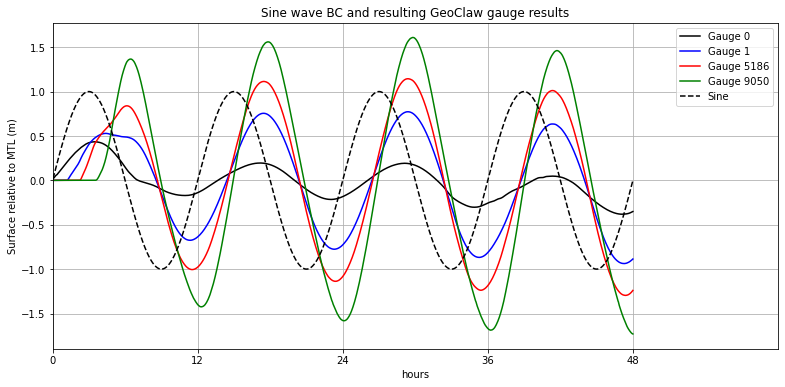

In [4]:
figure(400, figsize=(13,6))
clf()
colors = ['k','b','r','g']

outdir = '_output'

for k,gaugeno in enumerate([0,1,5186,9050]):
    gauge = gauges.GaugeSolution(gaugeno, outdir)
    t = gauge.t / 3600.   # convert to hours
    q = gauge.q
    eta = q[3,:]
    plot(t, eta, colors[k], label='Gauge %s' % gaugeno)
        
    
    # determine amplification and time shift:
    m2 = int(floor(0.75*len(eta)))
    eta2 = eta[m2:]  # last part of eta signal
    etamax2 = eta2.max()
    etamin2 = eta2.min()
    t2 = t[m2:]
    jtmax = argmax(eta2) 
    tshift = t2[jtmax] *3600.
    
    print('At gauge %i, etamin2 = %.3f, etamax2 = %.3f at tshift = %.1f s' \
            % (gaugeno,etamin2,etamax2,tshift))
    
#Sine Wave    
tperiod = 12
eta = 1.*sin(2*pi*t/tperiod)
plot(t, eta, 'k--', label='Sine')

legend(loc='upper right')
xlabel('hours')
ylabel('Surface relative to MTL (m)')
grid(True)
title('Sine wave BC and resulting GeoClaw gauge results');

xticks(arange(0,t[-1]+0.1,12))
xlim(0,60)

if 1:
    fname = 'GaugeComparison.png'
    savefig(fname, bbox_inches='tight')
    print('Created %s' % fname)

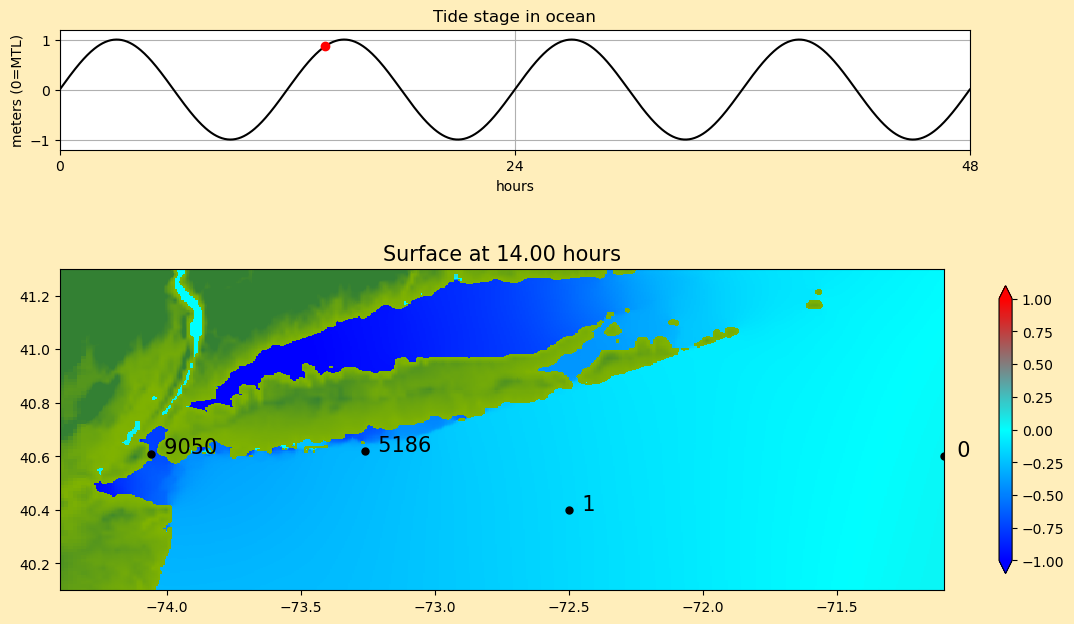

In [5]:
Image('frame0014fig50.png', width=800)